# Imports

In [2]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [25]:
universe = ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [26]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

# Signal

In [27]:
def custom_skew(series, window):
  num = (series - series.rolling(window).mean())**3
  denom = series.rolling(window).std(ddof=0)**3
  return (num/denom).rolling(window).mean()

In [36]:
sig = spot_returns.ffill().pipe(custom_skew, 252).pipe(demean_xs).pipe(cap_helper, 2).pipe(rolling_mean, 5)

<AxesSubplot:xlabel='Dates'>

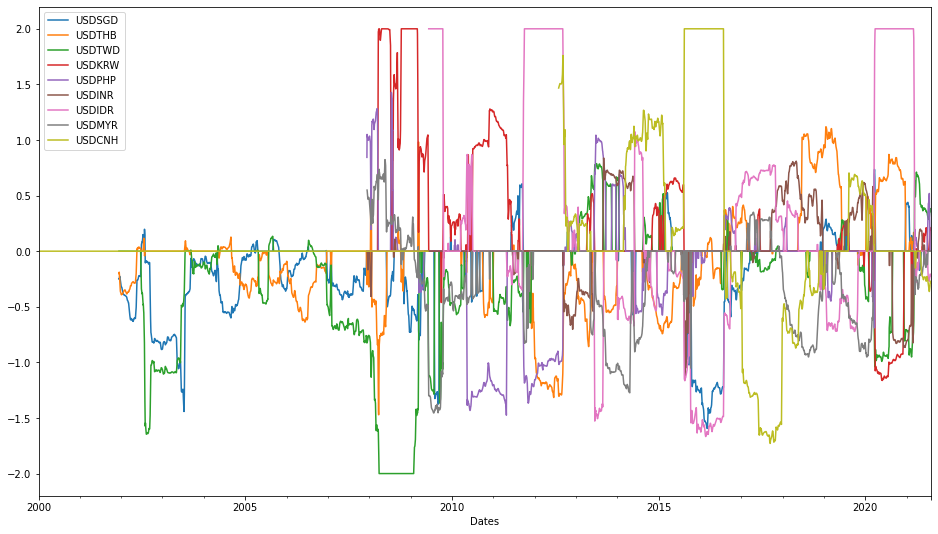

In [37]:
sig.plot()

# Backtest Daily Rebal

In [38]:
daily_bt = Backtest(signal = sig*-1, asset_returns = total_returns, tcost = abs(total_returns*0), settings = settings)
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [39]:
get_summary(daily_bt)

Returns   : -0.016188687343846854
Vol       : 0.11431271775463842
SR        : -0.14161755281327806
Max DD    : -86.99

C Returns : -0.02247876351887825
C SR      : -0.20893523051408938
C Max DD  : -59.75

Hit rate  : 0.505
W | N | L : 0.51 | 0.0 | 0.49
W/L Ratio : 1.02


In [40]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,-2.174442,-2.113286,1.961869,0.176345,-0.81186,0.686293,0.903141,-0.359222,0.344082
sharpe,-0.573756,-0.524326,0.33661,0.057661,-0.235766,0.538463,0.204859,-0.174082,0.099501
dollar_sharpe,-0.567809,-0.589637,0.300939,0.043075,-0.244291,0.529685,0.169606,-0.190758,0.081445
trade_sharpe,-0.747473,-0.683888,0.347793,0.050704,-0.283443,0.695573,0.215446,-0.210114,0.099501
long_sharpe,-0.84873,-0.812165,0.606371,-2.875796,-0.583908,0.93681,0.091289,-0.349337,3.114341
short_sharpe,-0.961863,-0.882464,-0.27835,0.160239,-0.190645,2.428504,0.594689,-1.645746,0.153386
sortino,-0.237937,-0.205545,0.161373,0.018002,-0.077195,0.144359,0.069193,-0.054016,0.026927
max_drawdown,-43.155321,-46.290511,-26.436742,-11.443955,-25.291901,-1.993969,-13.578199,-11.826506,-12.714224
max_drawdown_start,2004-07-28,2002-07-22,2007-05-23,2008-07-09,2010-05-25,2015-08-24,2015-09-28,2008-07-15,2014-11-18
max_drawdown_end,2016-04-19,2013-04-19,2008-03-24,2008-10-08,2013-08-27,2016-08-12,2016-11-23,2011-10-20,2015-08-25


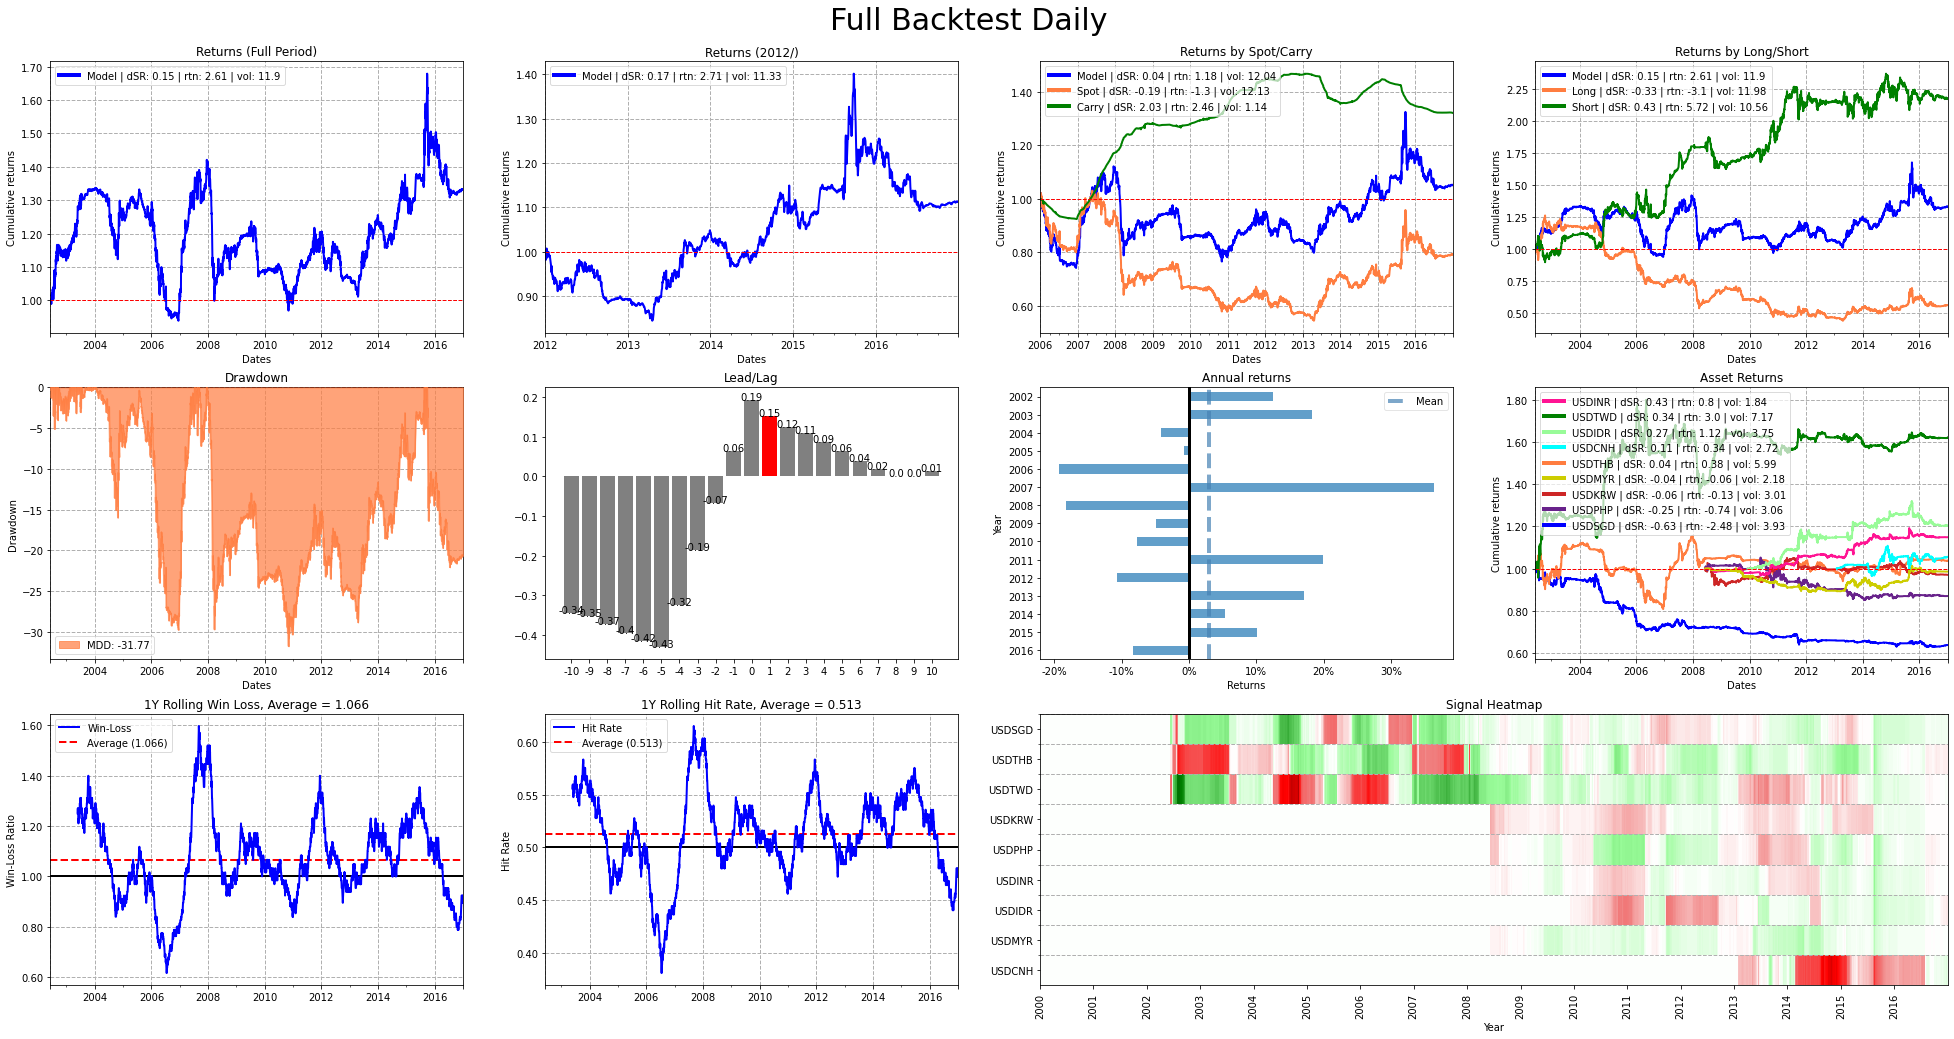

In [35]:
plot_bt(daily_bt, t="Full Backtest Daily")

# Backtest Weekly Rebal

In [34]:
weekly_bt = Backtest(signal = sig, 
             asset_returns = total_returns, 
             tcost = abs(total_returns*0), 
             settings = settings,
             settings_inject = {"rebalance_period":"friday"})
weekly_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [35]:
get_summary(weekly_bt)

Returns   : 0.07367738695435601
Vol       : 0.12011258198750538
SR        : 0.6134027404557855
Max DD    : -32.13

C Returns : 0.06864398030427338
C SR      : 0.5178226236056201
C Max DD  : -28.26

Hit rate  : 0.518
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.07


In [36]:
get_returns_stats(weekly_bt.asset_rtn, weekly_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,0.42658,0.479209,1.718101,1.098245,1.150616,0.342344,1.261211,0.324029,-0.063879
sharpe,0.242747,0.243872,0.642198,0.424038,0.4232,0.203799,0.526166,0.170178,-0.014041
dollar_sharpe,0.225425,0.228191,0.641474,0.411803,0.426318,0.18887,0.524905,0.162077,-0.035649
trade_sharpe,0.242747,0.243872,0.642198,0.424038,0.4232,0.203799,0.526166,0.170178,-0.014041
long_sharpe,-0.315422,-0.163934,0.704008,0.394115,0.602656,-0.392476,0.456886,0.028842,-0.181503
short_sharpe,0.706268,0.665928,0.621591,0.489875,-0.023515,0.564648,0.866812,0.44326,0.749638
sortino,0.143211,0.142397,0.415372,0.264957,0.266921,0.117962,0.309384,0.100904,-0.005528
max_drawdown,-5.899628,-6.811398,-7.220011,-7.12516,-7.952069,-6.826849,-7.023297,-8.654384,-15.05207
max_drawdown_start,2008-10-27,2004-05-17,2010-06-07,2009-11-16,2008-03-17,2014-07-09,2004-04-21,2003-08-26,2015-01-13
max_drawdown_end,2016-11-08,2006-04-03,2013-02-01,2013-01-02,2011-10-28,2016-09-07,2004-12-03,2004-12-03,2015-01-15


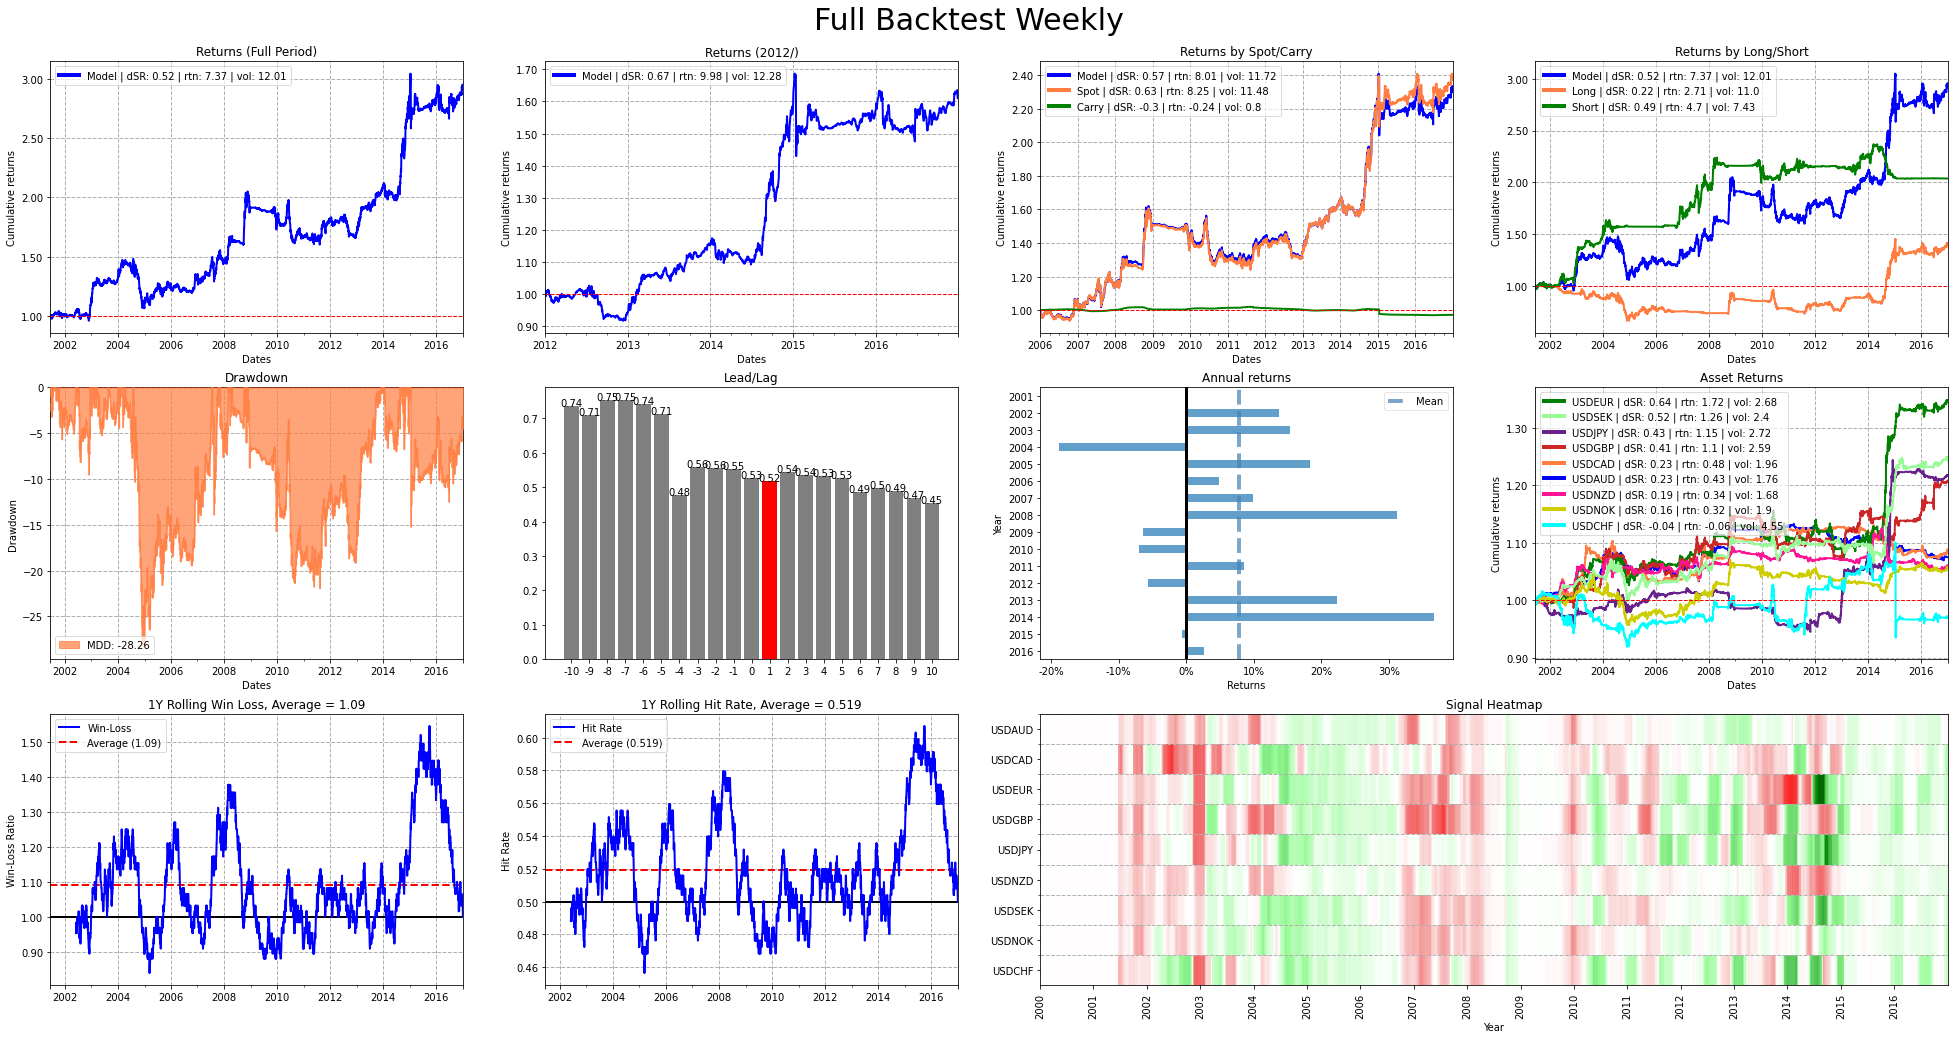

In [37]:
plot_bt(weekly_bt, t= "Full Backtest Weekly")

# Daily vs Weekly 

<AxesSubplot:title={'center':'Daily vs Weekly Rebal'}, xlabel='Dates', ylabel='Cumulative returns'>

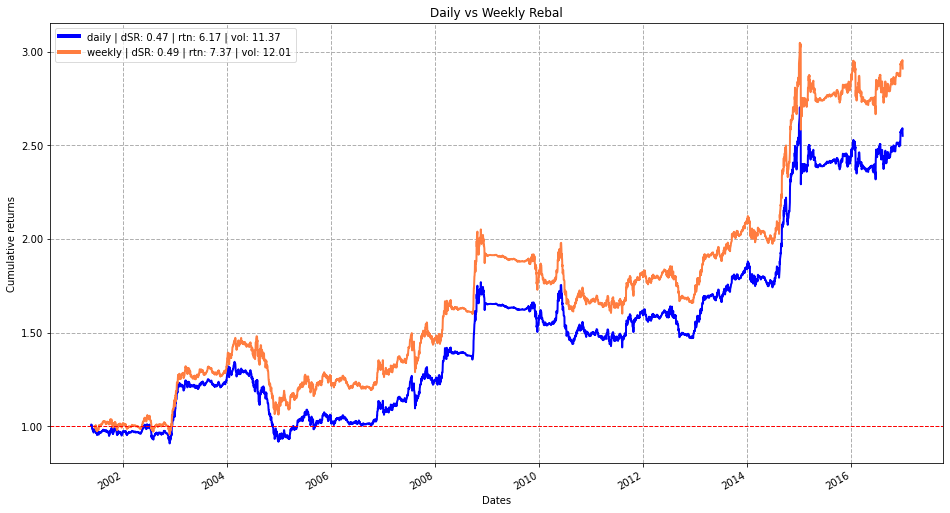

In [80]:
gen_plot_rtn(pd.concat([daily_bt.model_rtn.rename("daily"), weekly_bt.model_rtn.rename("weekly")], axis=1), main = "Daily vs Weekly Rebal")

In [81]:
pickle.dump(daily_bt, open("../BT/bp_skew_g10_daily.p", "wb"))
daily_bt = pickle.load(open("../BT/bp_skew_g10_daily.p", "rb"))

pickle.dump(weekly_bt, open("../BT/bp_skew_g10_weekly.p", "wb"))
weekly_bt = pickle.load(open("../BT/bp_skew_g10_weekly.p", "rb"))

# Regime Plot

# Sensitivity Analysis

In [20]:
# pf.plot_monthly_returns_dist(bt_obj.model_rtn)